In [1]:
# import the libraries as shown below
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets\Train'
test_path = 'Datasets\Test'

In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

94773248/94765736 [==============================] - 22s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [17]:
# useful for getting number of output classes
folders = glob('Datasets\Train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [19]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [21]:
# Use the Image Data Generator to import the images from the dataset
train_data = ImageDataGenerator(rescale=1/255, shear_range=0.3, zoom_range=0.2, horizontal_flip=True)

In [22]:
test_data = ImageDataGenerator(rescale=1/255)

In [25]:
training_set = train_data.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [26]:
test_set = test_data.flow_from_directory(test_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [27]:
#fitting the model
run = model.fit_generator(training_set, validation_data=test_set,epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 12s 6s/step - loss: 4.0706 - accuracy: 0.4062 - val_loss: 5.6615 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 11s 5s/step - loss: 6.9638 - accuracy: 0.3438 - val_loss: 1.9433 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 11s 6s/step - loss: 3.7797 - accuracy: 0.3906 - val_loss: 7.8722 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 11s 5s/step - loss: 5.1608 - accuracy: 0.3750 - val_loss: 4.2886 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 11s 5s/step - loss: 4.4927 - accuracy: 0.3438 - val_loss: 2.4080 - val_accuracy: 0.3448
Epoch 6/50
2/2 [==============================] - 11s 5s/step - loss: 3.5218 - accuracy: 0.4375 - val_loss: 4.3036 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 11s 5s/step - loss: 2.2087 - accuracy: 0.4688 

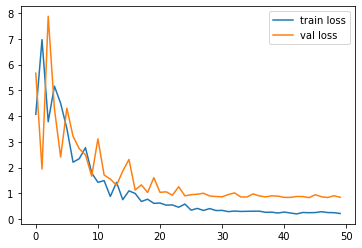

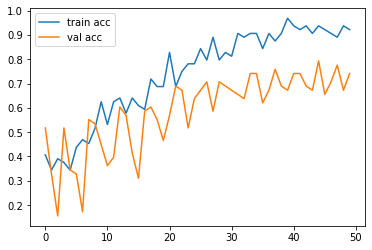

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
plt.plot(run.history['loss'], label='train loss')
plt.plot(run.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(run.history['accuracy'], label='train acc')
plt.plot(run.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
model.save('model_resnet50.h5')

In [31]:
y_pred = model.predict(test_set)
y_pred

array([[1.9534186e-01, 2.5415704e-01, 5.5050117e-01],
       [8.9063651e-06, 1.1197613e-03, 9.9887127e-01],
       [2.1091698e-02, 1.7868969e-01, 8.0021858e-01],
       [3.6234729e-02, 2.5394574e-01, 7.0981956e-01],
       [1.0328027e-03, 9.9398392e-01, 4.9832556e-03],
       [9.0481257e-01, 4.4367161e-02, 5.0820310e-02],
       [5.9184019e-02, 2.2059546e-03, 9.3861008e-01],
       [1.5594256e-04, 9.9765366e-01, 2.1904665e-03],
       [3.6101967e-02, 5.8129311e-01, 3.8260499e-01],
       [3.7835285e-02, 7.8864270e-01, 1.7352200e-01],
       [1.7363967e-01, 1.1422782e-01, 7.1213245e-01],
       [1.7858336e-05, 5.6060067e-05, 9.9992609e-01],
       [1.5130307e-02, 8.9173347e-01, 9.3136251e-02],
       [6.2623098e-02, 8.4614390e-01, 9.1233023e-02],
       [9.7061517e-03, 9.3491310e-01, 5.5380832e-02],
       [1.1343647e-02, 9.4539863e-01, 4.3257773e-02],
       [8.7722324e-02, 1.2633658e-02, 8.9964396e-01],
       [2.8673589e-01, 3.3898318e-01, 3.7428096e-01],
       [5.3940791e-01, 6.906

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2,
       0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)